In [50]:
import numpy as np

class ClearRegression:
    def __init__(self):
        self.w = None

    def fit(self, X, Y):
        # Calcula os parâmetros de regressão linear usando a fórmula OLS
        self.w = np.linalg.inv(X.T @ X) @ X.T @ Y

    def predict(self, X):
        # Realiza a previsão multiplicando a matriz X pelos parâmetros w
        return X @ self.w

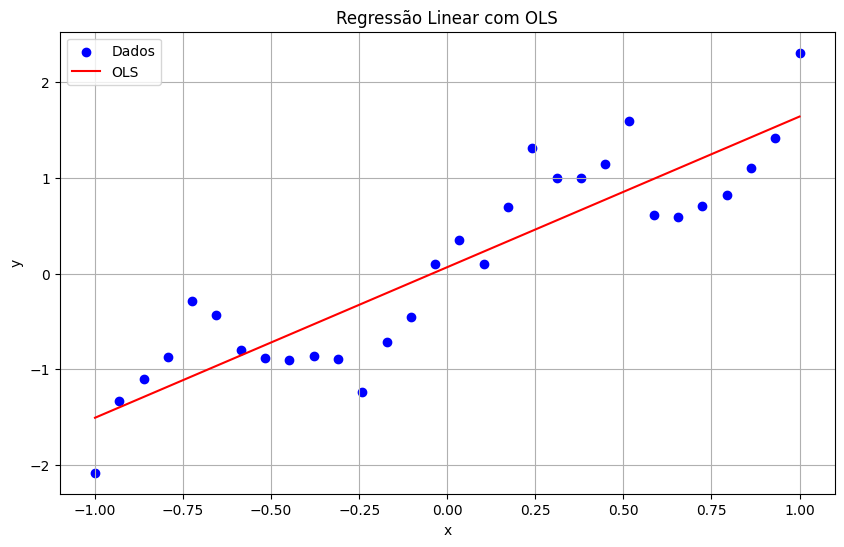

Parâmetros OLS (w): [0.06761792 1.57486517]
MSE OLS: 0.21340090132936987


In [51]:
# Regressão Linear com OLS em Programação Orientada a Objetos (POO)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LinearRegressionOLS:
    def __init__(self):
        self.w = None  # Inicializa os parâmetros como None
        self.mse_ols = None  # Inicializa o erro quadrático médio como None

    def fit(self, X, y):
        """ Ajusta o modelo aos dados usando Mínimos Quadrados Ordinários (OLS). """
        # Adiciona termo de bias (intercepto) na matriz X
        X_b = np.c_[np.ones((len(X), 1)), X]
        # Calcula os parâmetros w conforme OLS: w = (X^T X)^-1 X^T y
        self.w = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

        # Calcula o MSE para avaliar o modelo
        y_pred = X_b @ self.w
        self.mse_ols = np.mean((y - y_pred) ** 2)

    def predict(self, X):
        """ Faz previsões para novos dados. """
        # Adiciona termo de bias (intercepto) na matriz X
        X_b = np.c_[np.ones((len(X), 1)), X]
        return X_b @ self.w

    def plot_results(self, X, y):
        """ Plota os resultados ajustados em relação aos dados originais. """
        plt.figure(figsize=(10, 6))
        plt.scatter(X, y, label='Dados', color='blue')
        y_pred = self.predict(X)
        plt.plot(X, y_pred, label='OLS', color='red')
        plt.title('Regressão Linear com OLS')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.grid()
        plt.show()

    def print_parameters(self):
        """ Exibe os parâmetros ajustados e o erro quadrático médio (MSE). """
        print(f'Parâmetros OLS (w): {self.w}')
        print(f'MSE OLS: {self.mse_ols}')


# Carregar os dados corretamente com x e y nas colunas
data = pd.read_csv('../data/artificial1d.csv', header=None)
x = data.iloc[:, 0].values
y = data.iloc[:, 1].values

# Instanciar o modelo de regressão
model = LinearRegressionOLS()

# Ajustar o modelo aos dados
model.fit(x, y)

# Fazer previsões e plotar os resultados
model.plot_results(x, y)

# Exibir os parâmetros e o MSE
model.print_parameters()


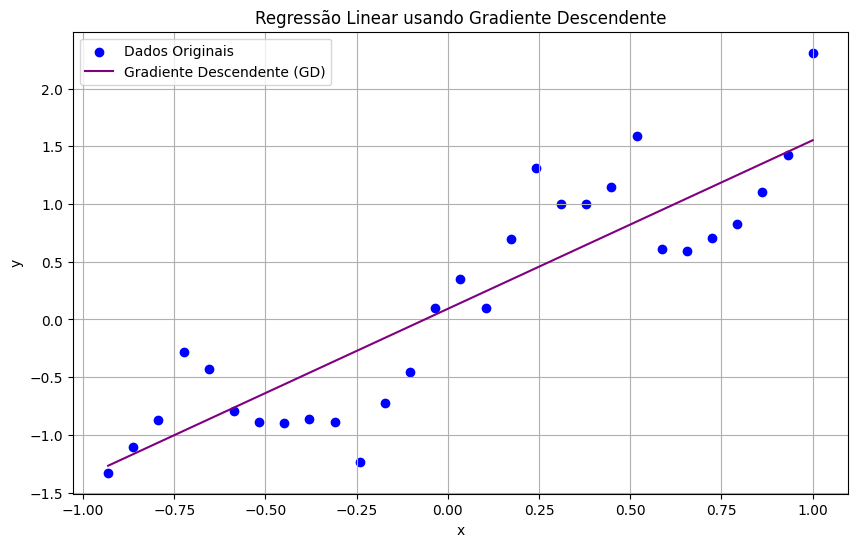

Parâmetros GD (theta): [0.09233837 1.45937179]
Último MSE GD: 0.2086873139902789


In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import os

class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate  # Taxa de aprendizado
        self.epochs = epochs                # Número de épocas
        self.theta = None                   # Inicializa os parâmetros como None
        self.mse_history = []               # Para armazenar o histórico do MSE

    def fit(self, X, y):
        """ Ajusta o modelo aos dados usando Gradiente Descendente. """
        N = len(y)
        X_b = np.c_[np.ones((len(X), 1)), X]  # Adiciona termo de bias (intercepto)
        self.theta = np.zeros(X_b.shape[1])    # Inicializa os parâmetros theta

        for t in range(self.epochs):
            # Calcula as previsões
            y_pred = X_b @ self.theta

            # Calcula o erro
            errors = y - y_pred

            # Atualiza os parâmetros conforme a fórmula
            self.theta[0] += (self.learning_rate / N) * np.sum(errors)
            self.theta[1] += (self.learning_rate / N) * np.sum(errors * X_b[:, 1])

            # Calcula e armazena o MSE
            mse = np.mean(errors ** 2)
            self.mse_history.append(mse)

            # Salva o gráfico para o GIF
            self.plot_results(X, y, t)

    def predict(self, X):
        """ Faz previsões para novos dados. """
        X_b = np.c_[np.ones((len(X), 1)), X]  # Adiciona termo de bias (intercepto)
        return X_b @ self.theta

    def plot_results(self, X, y, epoch=None):
        """ Plota os resultados ajustados em relação aos dados originais. """
        plt.figure(figsize=(10, 6))
        plt.scatter(X, y, color="blue", label="Dados Originais")
        y_pred = self.predict(X)
        plt.plot(X, y_pred, color="purple", label="Gradiente Descendente (GD)")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend()
        plt.title("Regressão Linear usando Gradiente Descendente" + (f" - Epoch {epoch + 1}" if epoch is not None else ""))
        plt.grid()
        plt.savefig(f"frame_{epoch}.png") if epoch is not None else plt.show()  # Salva o frame se epoch não for None
        plt.close()  # Fecha a figura para evitar sobreposição

    def create_gif(self):
        """ Cria um GIF a partir dos frames salvos. """
        with imageio.get_writer('regressao_gd.gif', mode='I', duration=0.2) as writer:
            for epoch in range(self.epochs):
                image = imageio.imread(f"frame_{epoch}.png")
                writer.append_data(image)

        # Remover as imagens temporárias
        for epoch in range(self.epochs):
            os.remove(f"frame_{epoch}.png")

    def print_parameters(self):
        """ Exibe os parâmetros ajustados e o histórico do MSE final. """
        print(f'Parâmetros GD (theta): {self.theta}')
        print(f'Último MSE GD: {self.mse_history[-1]}')

# Carregar os dados
data = pd.read_csv('../data/artificial1d.csv')
x = data.iloc[:, 0].values
y = data.iloc[:, 1].values

# Instanciar o modelo de regressão com Gradiente Descendente
model_gd = LinearRegressionGD(learning_rate=0.01, epochs=1000)

# Ajustar o modelo aos dados
model_gd.fit(x, y)

# Criar o GIF
model_gd.create_gif()

# Fazer previsões e plotar os resultados finais
model_gd.plot_results(x, y)

# Exibir os parâmetros e o último MSE
model_gd.print_parameters()


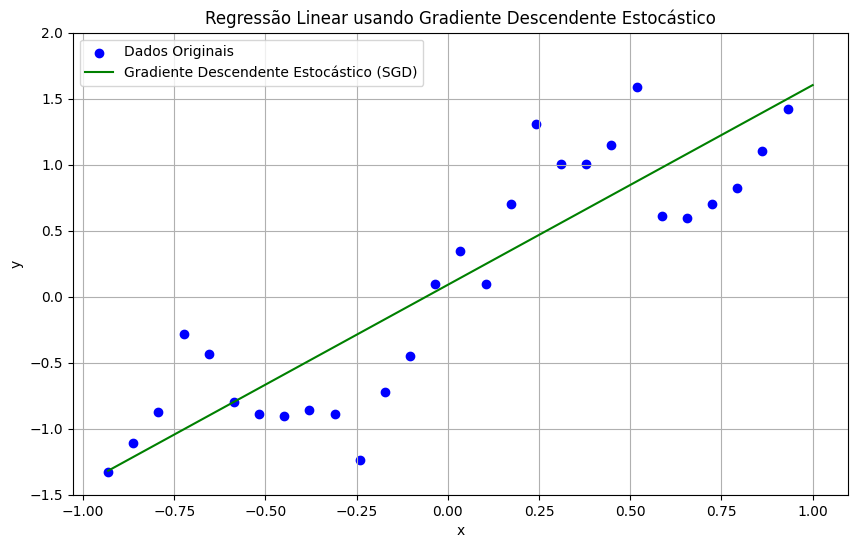

Parâmetros SGD (theta): [0.0902829  1.51293353]
Último MSE SGD: 0.20771290327380498


In [70]:
# Regressão Linear com Gradiente Descendente Estocástico em Programação Orientada a Objetos (POO)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import os

class LinearRegressionSGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate  # Taxa de aprendizado
        self.epochs = epochs                # Número de épocas
        self.theta = None                   # Inicializa os parâmetros como None
        self.mse_history = []               # Para armazenar o histórico do MSE

    def fit(self, X, y):
        """ Ajusta o modelo aos dados usando Gradiente Descendente Estocástico. """
        N = len(y)
        X_b = np.c_[np.ones((len(X), 1)), X]  # Adiciona termo de bias (intercepto)
        self.theta = np.zeros(X_b.shape[1])    # Inicializa os parâmetros theta

        for epoch in range(self.epochs):
            indices = np.random.permutation(N)
            
            for i in indices:
                xi = X_b[i, :]
                yi = y[i]
                y_pred = xi @ self.theta
                error = yi - y_pred
                self.theta[0] += self.learning_rate * error         # Atualiza w0
                self.theta[1] += self.learning_rate * error * xi[1] # Atualiza w1
            
            mse = np.mean((X_b @ self.theta - y) ** 2)
            self.mse_history.append(mse)

            # Salva o gráfico para o GIF a cada época
            self.plot_results(X, y, epoch=epoch)

    def predict(self, X):
        """ Faz previsões para novos dados. """
        X_b = np.c_[np.ones((len(X), 1)), X]  # Adiciona termo de bias (intercepto)
        return X_b @ self.theta

    def plot_results(self, X, y, epoch=None):
        """ Plota os resultados ajustados em relação aos dados originais. """
        plt.figure(figsize=(10, 6))
        plt.scatter(X, y, color="blue", label="Dados Originais")
        y_pred = self.predict(X)
        plt.plot(X, y_pred, color="green", label="Gradiente Descendente Estocástico (SGD)")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.ylim(-1.5, 2)  # Ajustando o limite do eixo y
        plt.legend()
        plt.title(f"Regressão Linear usando Gradiente Descendente Estocástico")
        plt.grid()
        
        if epoch is not None:  # Salva como imagem se for para o GIF
            plt.title(f"Epoch: {epoch + 1} - Regressão Linear usando Gradiente Descendente Estocástico")
            plt.savefig(f"frame_{epoch}.png")
            plt.close()
        else:
            plt.show()

    def create_gif(self):
        """ Cria um GIF a partir dos frames salvos. """
        with imageio.get_writer('regressao_sgd.gif', mode='I', duration=0.2) as writer:
            for epoch in range(self.epochs):
                image = imageio.imread(f"frame_{epoch}.png")
                writer.append_data(image)

        # Remover as imagens temporárias
        for epoch in range(self.epochs):
            os.remove(f"frame_{epoch}.png")

    def print_parameters(self):
        """ Exibe os parâmetros ajustados e o histórico do MSE final. """
        print(f'Parâmetros SGD (theta): {self.theta}')
        print(f'Último MSE SGD: {self.mse_history[-1]}')


# Carregar os dados
data = pd.read_csv('../data/artificial1d.csv')
x = data.iloc[:, 0].values
y = data.iloc[:, 1].values

# Instanciar o modelo de regressão com Gradiente Descendente Estocástico
model_sgd = LinearRegressionSGD(learning_rate=0.01, epochs=150)

# Ajustar o modelo aos dados
model_sgd.fit(x, y)

# Criar o GIF
model_sgd.create_gif()

# Plotar os resultados finais
model_sgd.plot_results(x, y)  # Chamado sem `epoch` para exibir o gráfico final

# Exibir os parâmetros e o último MSE
model_sgd.print_parameters()
